## load libraries

In [95]:
import os
import keyring
import urllib3
import requests
import json
import folium

import ipywidgets as widgets

from IPython.display import display


from arcgis.gis import GIS
from arcgis.auth import EsriSession
from arcgis.geocoding import geocode
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer
from arcgis.mapping import MapImageLayer
from arcgis.raster import ImageryLayer

from arcgis.widgets import MapView
import arcgis.raster.functions 

# import rasterio
# from rasterio.plot import show

In [2]:
# I keep getting security warnings, but cannot get the gis object to recognize the certificates
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [3]:
MapView.set_js_cdn("https://umich.maps.arcgis.com/jsapi4/")

In [4]:
# UMich ArcGIS Online URL
org_url = "https://umich.maps.arcgis.com/"

username = 'jqwhite_umich'

In [5]:
client_id = os.getenv('ARCGIS_CLIENT_ID')
client_secret = os.getenv('ARCGIS_CLIENT_SECRET')

if not client_id or not client_secret:
    raise ValueError("Please set the ARCGIS_CLIENT_ID and ARCGIS_CLIENT_SECRET environment variables")

In [6]:
# URL to generate token
token_url = 'https://www.arcgis.com/sharing/rest/oauth2/token/'

# Parameters for token generation
params = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'expiration': 60  # Token expiration in minutes
}

# Request token
response = requests.post(token_url, data=params)
token_info = response.json()
token = token_info['access_token']

print(f'Token: {token}')

Token: 3NKHt6i2urmWtqOuugvr9VBUiUulejsvbtSerDSic6APlrRYgesisU7zuJsn6vvLFarNJvmjh6MjiWjpC5H8B4lxmY6zIOohISoMLH2JlQmW2q4ooEBsw7aQTJd6QXYH


In [7]:
# # OAuth credentials

profile = 'umich_arcgis_siads699'

# # Path to your certificate bundle
cert_path = '/Users/jwhite/umich_cert.pem'  # Update this path to your certificate bundle

# Create a GIS object using OAuth credentials
# gis = GIS(org_url, client_id=client_id, client_secret=client_secret, verify_cert=cert_path)
# gis = GIS(org_url, client_id=client_id, client_secret=client_secret)
gis = GIS(org_url, client_id=client_id, client_secret=client_secret, token=token)

# can't get profile to work:
# Exception: A general error occurred: cannot access local variable 'code' where it is not associated with a value
# Load the GIS object using the saved profile
# gis = GIS(profile=profile)

<Item title:"U.S. Climate Thresholds - LOCA Historical" type:Tiled Imagery Layer owner:maps_nationalclimate>
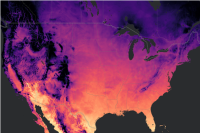

In [47]:
us_loca_historical = gis.content.get('d05d0d54334d4b2b84aae67ba2cc00c0')
us_loca_historical

In [71]:
for key in us_loca_historical:
    print(key)

id
owner
orgId
created
modified
guid
name
title
type
typeKeywords
description
tags
snippet
thumbnail
documentation
extent
categories
spatialReference
accessInformation
classification
licenseInfo
culture
properties
advancedSettings
url
proxyFilter
access
size
subInfo
appCategories
industries
languages
largeThumbnail
banner
screenshots
listed
commentsEnabled
numComments
numRatings
avgRating
numViews
scoreCompleteness
groupDesignations
apiToken1ExpirationDate
apiToken2ExpirationDate
contentOrigin
lastViewed
layers
tables


In [67]:
us_loca_historical.url

'https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/arcgis/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer'

In [69]:
us_loca_historical.layers

[<ImageryLayer url:"https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/arcgis/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer">]

In [88]:
us_loca_historical.accessInformation

'USGCRP, NOAA/TSU, Esri'

In [92]:
us_loca_historical.categories

['/Categories/Climate Models',
 '/Categories/Drought',
 '/Categories/Flooding',
 '/Categories/Extreme Heat',
 '/Categories/Wildfire']

In [10]:
us_loca_historical.get_data(try_json=True)

{'visibility': True,
 'opacity': 1,
 'bandIds': [0],
 'layerType': 'ArcGISTiledImageServiceLayer',
 'layerDefinition': {'drawingInfo': {'renderer': {'type': 'rasterStretch',
    'stretchType': 'minMax',
    'colorRamp': {'type': 'multipart',
     'colorRamps': [{'type': 'algorithmic',
       'algorithm': 'esriHSVAlgorithm',
       'fromColor': [0, 0, 4, 255],
       'toColor': [1, 0, 5, 255]},
      {'type': 'algorithmic',
       'algorithm': 'esriHSVAlgorithm',
       'fromColor': [1, 0, 5, 255],
       'toColor': [1, 1, 6, 255]},
      {'type': 'algorithmic',
       'algorithm': 'esriHSVAlgorithm',
       'fromColor': [1, 1, 6, 255],
       'toColor': [1, 1, 8, 255]},
      {'type': 'algorithmic',
       'algorithm': 'esriHSVAlgorithm',
       'fromColor': [1, 1, 8, 255],
       'toColor': [2, 1, 10, 255]},
      {'type': 'algorithmic',
       'algorithm': 'esriHSVAlgorithm',
       'fromColor': [2, 1, 10, 255],
       'toColor': [2, 2, 12, 255]},
      {'type': 'algorithmic',
      

In [121]:
# Access the image service
image_layer = ImageryLayer(us_loca_historical.url)

In [123]:
image_layer.multidimensional_info

{'multidimensionalInfo': {'layout': 1,
  'type': 'MultidimensionalInfo',
  'variables': [{'name': 'Consecutive Dry Days',
    'description': None,
    'unit': None,
    'statistics': [{'min': 6.239999771118164,
      'max': 189.19000244140625,
      'mean': 24.488971692889596,
      'standardDeviation': 21.332793927319116,
      'median': 189.19000244140625,
      'mode': 8.0,
      'skipX': 1,
      'skipY': 1,
      'count': 622928}],
    'histograms': [{'size': 256,
      'min': 6.239999771118164,
      'max': 189.19000244140625,
      'counts': [2565,
       6660,
       12573,
       16185,
       12520,
       8672,
       9205,
       8098,
       8407,
       8825,
       10015,
       11237,
       12353,
       13262,
       10981,
       8554,
       7789,
       7545,
       7174,
       6677,
       6609,
       5785,
       5181,
       4439,
       4132,
       3983,
       3692,
       3410,
       3447,
       3031,
       2737,
       2664,
       2471,
       2579,
 

In [124]:
image_layer.get_samples?

Signature:
image_layer.get_samples(
    geometry: 'Union[Geometry, Point, MultiPoint, Polyline, Polygon, Envelope]',
    geometry_type: 'Optional[str]' = None,
    sample_distance: 'Optional[float]' = None,
    sample_count: 'Optional[int]' = None,
    mosaic_rule: 'Optional[dict[str, str]]' = None,
    pixel_size: 'Optional[Union[dict[str, float], str]]' = None,
    return_first_value_only: 'Optional[bool]' = None,
    interpolation: 'Optional[str]' = None,
    out_fields: 'Optional[str]' = None,
    slice_id: 'Optional[int]' = None,
    time: 'Optional[Union[str, list[datetime.date], list[datetime.datetime], datetime.date, datetime.datetime]]' = None,
)
Docstring:
The ``get_samples`` operation is supported by both mosaic dataset and raster
dataset imagery layers.
The result of this operation includes sample point locations, pixel
values, and corresponding spatial resolutions of the source data for a
given geometry.

.. note::
    * When the input geometry is a :class:`~arcgis.geometr

In [13]:
image_layer.raster_info

{'extent': {'xmin': -126,
  'ymin': 23.375,
  'xmax': -66,
  'ymax': 54,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 'bandCount': 1,
 'pixelType': 'F32',
 'pixelSizeX': 0.0625,
 'pixelSizeY': 0.0625,
 'compressionType': 'LERC',
 'blockHeight': 256,
 'blockWidth': 256,
 'noDataValues': [3.4e+38]}

In [14]:
# URL for service capabilities
capabilities_url = "https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/ArcGIS/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer"

# Query the service capabilities
response = requests.get(f"{capabilities_url}?f=json")
capabilities = response.json()
# print(capabilities)
capabilities

{'currentVersion': 11.2,
 'name': 'U_S__Climate_Thresholds___LOCA_Historic',
 'serviceDescription': '',
 'description': '',
 'type': 'ImageServer',
 'capabilities': 'Image,TilesOnly',
 'copyrightText': '',
 'serviceItemId': 'd05d0d54334d4b2b84aae67ba2cc00c0',
 'meanPixelSize': 6957.468174579598,
 'server': '0Fs3HcaFfvzXvm7w',
 'created': None,
 'modified': None,
 'status': 'created',
 'access': 'SECURE',
 'allowAnalysis': True,
 'allowCopy': False,
 'serviceSourceType': 'esriImageServiceSourceTypeDataset',
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
 'extent': {'xmin': -126,
  'ymin': 23.375,
  'xmax': -66,
  'ymax': 54,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 'initialExtent': {'xmin': -126,
  'ymin': 23.375,
  'xmax': -66,
  'ymax': 54,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 'fullExtent': {'xmin': -126,
  'ymin': 23.375,
  'xmax': -66,
  'ymax': 54,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 'datasetFormat': 'Cache

In [15]:
dir(arcgis.raster.functions)

['FLOAT',
 'GIS',
 'INT',
 'ImageryLayer',
 'Item',
 'NDVI',
 'Optional',
 'RFT',
 'Raster',
 'RasterCollection',
 'RasterInfo',
 'Union',
 '_ArcpyRaster',
 '_ArcpyRasterCollection',
 '_FeatureLayer',
 '_LOGGER',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_analysis_job',
 '_analysis_job_results',
 '_analysis_job_status',
 '_arcgis',
 '_clone_layer',
 '_clone_layer_raster',
 '_clone_layer_raster_without_copy',
 '_clone_layer_without_copy',
 '_find_object_ref',
 '_get_raster',
 '_get_raster_ra',
 '_get_raster_ra_rft',
 '_get_raster_url',
 '_input_rft',
 '_json',
 '_pick',
 '_pixel_type_string_to_long',
 '_python_variable_name',
 '_raster_input',
 '_raster_input_rft',
 '_raster_item',
 '_replace_raster_url',
 '_set_multidimensional_rules',
 '_simple_collection',
 'abs',
 'acos',
 'acosh',
 'aggregate',
 'aggregate_cells',
 'annotations',
 'apparent_reflectance',
 'apply',
 'arg_max',
 'arg_median',
 'arg

In [16]:
image_layer.properties

{
  "currentVersion": 11.2,
  "name": "U_S__Climate_Thresholds___LOCA_Historic",
  "serviceDescription": "",
  "description": "",
  "type": "ImageServer",
  "capabilities": "Image,TilesOnly",
  "copyrightText": "",
  "serviceItemId": "d05d0d54334d4b2b84aae67ba2cc00c0",
  "meanPixelSize": 6957.468174579598,
  "server": "0Fs3HcaFfvzXvm7w",
  "created": null,
  "modified": null,
  "status": "created",
  "access": "SECURE",
  "allowAnalysis": true,
  "allowCopy": false,
  "serviceSourceType": "esriImageServiceSourceTypeDataset",
  "spatialReference": {
    "wkid": 4326,
    "latestWkid": 4326
  },
  "extent": {
    "xmin": -126,
    "ymin": 23.375,
    "xmax": -66,
    "ymax": 54,
    "spatialReference": {
      "wkid": 4326,
      "latestWkid": 4326
    }
  },
  "initialExtent": {
    "xmin": -126,
    "ymin": 23.375,
    "xmax": -66,
    "ymax": 54,
    "spatialReference": {
      "wkid": 4326,
      "latestWkid": 4326
    }
  },
  "fullExtent": {
    "xmin": -126,
    "ymin": 23.375,
  

In [18]:
# Check if the image service allows exporting data
print(us_loca_historical.properties.get('exportTilesAllowed'))

None


In [19]:
from arcgis.raster.functions import multidimensional_filter
from datetime import datetime

# Define the dimension values
dimension_name = 'StdTime'
dimension_value = datetime(1990, 1, 1, 0, 0, 0).isoformat()  # Example date

# Apply the multidimensional filter
filtered_layer = multidimensional_filter(
    raster=image_layer,
    variables=['Consecutive Dry Days'],  # Specify the variable you are interested in
    dimension_definition='BY_VALUES',
    dimension_values=[{"dimension": dimension_name, "value": dimension_value}]
)

# Print the filtered layer to check the result
print(filtered_layer)

<ImageryLayer url:"">


In [103]:
# gis.api_keys.get?

In [105]:
# arcgis.raster.functions.multidimensional_filter?

In [93]:
# Define the point geometry in GeoJSON format
geometry = {
    "geometryType": "esriGeometryPoint",
    "geometries": [{
        "x": -100,
        "y": 40,
        "spatialReference": {"wkid": 4326}
    }]
}

# Base URL for the ImageServer query with token
query_url = f"https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/ArcGIS/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer/getSamples?token={token}"

# Parameters for the getSamples request
params = {
    "f": "json",
    "geometry": '{"x": -100, "y": 40}',  # Adjust the coordinates as needed
    "geometryType": "esriGeometryPoint",
    "sr": "4326",
    "interpolation": "RSP_NearestNeighbor"
}

# Make the getSamples request
response = requests.get(query_url, params=params)
data = response.json()

# Process and print the data
print(data)

{'error': {'code': 400, 'message': 'Invalid URL', 'details': ['Invalid URL']}}


In [28]:
# Base URL for the ImageServer query
query_url = "https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/ArcGIS/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer/getSamples"

# Parameters for the getSamples request
params = {
    "f": "json",
    "geometry": '{"x": -100, "y": 40}',  # Adjust the coordinates as needed
    "geometryType": "esriGeometryPoint",
    "sr": "4326",
    "interpolation": "RSP_NearestNeighbor"
}

# Headers with token
headers = {
    "Authorization": f"Bearer {token}"
}

# Make the getSamples request
response = requests.get(query_url, params=params, headers=headers)
data = response.json()

# Process and print the data
print(data)

{'error': {'code': 400, 'message': 'Invalid URL', 'details': ['Invalid URL']}}


In [29]:
# Check if the service supports multidimensional data
capabilities_url = "https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/ArcGIS/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer"

# Query the service capabilities
response = requests.get(f"{capabilities_url}?f=json")
capabilities = response.json()

print(capabilities.get('hasMultidimensions', False))

True


In [30]:
# # Define the bounding box for the export
# bbox = {
#     "xmin": -105,
#     "ymin": 35,
#     "xmax": -95,
#     "ymax": 45,
#     "spatialReference": {"wkid": 4326}
# }

# # Additional parameters for multidimensional data
# mosaic_rule = {
#     "mosaicMethod": "esriMosaicNone"
# }
# rendering_rule = {
#     "rasterFunction": "None"
# }

# # Export image
# exported_image = image_layer.export_image(
#     bbox=bbox,
#     size=[1000, 1000],
#     export_format='tiff',
#     mosaic_rule=mosaic_rule,
#     rendering_rule=rendering_rule,
#     f='json'
# )

RuntimeError: Failed to perform export image operation on the TilesOnly service

In [32]:
dir(MapView)

['__annotations__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_graphic',
 '_add_layer_to_webmap',
 '_add_layer_to_widget',
 '_add_notifiers',
 '_add_notype_layer',
 '_add_overlay',
 '_add_this_graphic',
 '_add_this_notype_layer',
 '_add_to_hashed_layers',
 '_all_trait_default_generators',
 '_apply_renderer_to_webmap_layer_id',
 '_assemble_html_embed_html_str',
 '_assemble_img_preview_html_str',
 '_auth_mode',
 '_basemap',
 '_call_widget_constructed',
 '_cell_output_screenshot_callback_resp',
 '_cell_output_screenshot_update_callback',
 '_center',
 '_center_long_lat',
 '_check_for_drawn_layers',
 '_check_for_rende

In [38]:
MapView.widget_types

In [41]:
MapView.widgets

{}

In [42]:
# # Define the coordinates for New Mexico
# geometry = {"x": -106.328, "y": 34.708, "spatialReference": {"wkid": 4326}}

# # Perform the query
# query_result = image_layer.query(
#     geometry_filter=geometry,
#     return_geometry=True,
#     out_fields="*",
#     pixel_size=0.0625  # Optional: specify pixel size if needed
# )

# # Print the query result
# print(query_result)

RuntimeError: This operation cannot be performed on a TilesOnly Service

In [43]:
# Define the geometry for New Mexico
geometry = {"x": -106.328, "y": 34.708, "spatialReference": {"wkid": 4326}}

# Define the parameters
params = {
    "geometry": geometry,
    "geometryType": "esriGeometryPoint",
    "returnFirstValueOnly": True,
    "f": "json"
}

# Call getSamples
samples = image_layer.get_samples(params)

# Print the samples
print(samples)

RuntimeError: Failed to perform get samples operation on the TilesOnly service

## success!  `get_samples`

In [109]:
import requests

# Define the base URL of your image service
base_url = 'https://landscape12.arcgis.com/arcgis/rest/services/LOCA_USA_CONUS_Climate_Thresholds/ImageServer'

# Construct the URL for the multidimensionalInfo endpoint
multidimensional_info_url = f"{base_url}/multidimensionalInfo"

# Define the parameters
params = {
    'f': 'json'
}

# Make the request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    display(data)
else:
    display(f"Error: {response.status_code}")

{'error': {'code': 400,
  'message': 'Unable to complete operation.',
  'details': []}}

In [108]:
import requests

# Define the URL for the getSamples operation
url = "https://landscape12.arcgis.com/arcgis/rest/services/LOCA_USA_CONUS_Climate_Thresholds/ImageServer/getSamples"

# Define the parameters for the request
params = {
    "geometryType": "esriGeometryPoint",
    "geometry": '{"x": -106.328, "y": 34.708, "spatialReference": {"wkid": 4326}}',
    "f": "json",
    "pixelSize": "0.0625,0.0625",
    "returnFirstValueOnly": "true",
}

# Make the request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    display(data)
else:
    display(f"Error: {response.status_code}")

{'samples': [{'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '0.129999995',
   'rasterId': 109,
   'resolution': 0.0625}]}

In [100]:
import requests

# Define the URL for the getSamples operation
url = "https://landscape12.arcgis.com/arcgis/rest/services/LOCA_USA_CONUS_Climate_Thresholds/ImageServer/getSamples"

# Define the parameters for the request
params = {
    "geometryType": "esriGeometryPoint",
    "geometry": '{"x": -106.328, "y": 34.708, "spatialReference": {"wkid": 4326}}',
    "f": "json",
    "pixelSize": "0.0625,0.0625",
    "returnFirstValueOnly": "false",
}

# Make the request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # print(data)
    display(data)
else:
    print(f"Error: {response.status_code}")

{'samples': [{'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '0.129999995',
   'rasterId': 109,
   'resolution': 0.0625},
  {'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '70.729995728',
   'rasterId': 91,
   'resolution': 0.0625},
  {'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '12.430000305',
   'rasterId': 18,
   'resolution': 0.0625},
  {'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '54.130001068',
   'rasterId': 81,
   'resolution': 0.0625},
  {'location': {'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
   'locationId': 0,
   'value': '31.810001373',
   'rasterId': 14,
   'r

In [102]:
len(data['samples'])

20

In [107]:
import requests

# Define the base URL of your image service
base_url = 'https://landscape12.arcgis.com/arcgis/rest/services/LOCA_USA_CONUS_Climate_Thresholds/ImageServer'

# Construct the URL for the multidimensionalInfo endpoint
multidimensional_info_url = f"{base_url}/multidimensionalInfo"

# Define the parameters
params = {
    'f': 'json'
}

# Make the GET request
response = requests.get(multidimensional_info_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    multidimensional_info = response.json()
    display(multidimensional_info)
else:
    display(f"Failed to get multidimensional info: {response.status_code}")
    display(response.text)

{'multidimensionalInfo': {'variables': [{'name': 'Annual highest precipitation for a single day, Hig',
    'dimensions': [{'name': 'StdTime',
      'field': 'StdTime',
      'hasRegularIntervals': False,
      'interval': 7305,
      'intervalUnit': 'Days',
      'extent': [1924992000000, 3629145600000],
      'hasRanges': False,
      'values': [1924992000000, 2556144000000, 3629145600000]}]},
   {'name': 'Annual highest precipitation for a single day, His',
    'dimensions': [{'name': 'StdTime',
      'field': 'StdTime',
      'extent': [662688000000, 662688000000],
      'hasRanges': False,
      'values': [662688000000]}]},
   {'name': 'Annual highest precipitation for a single day, Low',
    'dimensions': [{'name': 'StdTime',
      'field': 'StdTime',
      'hasRegularIntervals': False,
      'interval': 7305,
      'intervalUnit': 'Days',
      'extent': [1924992000000, 3629145600000],
      'hasRanges': False,
      'values': [1924992000000, 2556144000000, 3629145600000]}]},
   

In [116]:
len(multidimensional_info['multidimensionalInfo']['variables'])

41

In [118]:
for item in multidimensional_info['multidimensionalInfo']['variables']:
    print(item['name'])

Annual highest precipitation for a single day, Hig
Annual highest precipitation for a single day, His
Annual highest precipitation for a single day, Low
Annual highest precipitation over a five-day perio
Annual number of days with a maximum temperature g
Annual precipitation days greater than 1 inch, Hig
Annual precipitation days greater than 1 inch, His
Annual precipitation days greater than 1 inch, Low
Annual precipitation days greater than 2 inches, H
Annual precipitation days greater than 2 inches, L
Annual precipitation days greater than 3 inches, H
Annual precipitation days greater than 3 inches, L
Annual precipitation days greater than 4 inches, H
Annual precipitation days greater than 4 inches, L
Annual precipitation, High emissions scenario (RCP
Annual precipitation, Historical, 1976-2005
Annual precipitation, Low emissions scenario (RCP 
Annual single highest maximum temperature, High em
Annual single highest maximum temperature, Histori
Annual single highest maximum temperat

In [120]:
import requests

# Define the base URL of your image service
base_url = "https://tiledimageservices3.arcgis.com/0Fs3HcaFfvzXvm7w/ArcGIS/rest/services/U_S__Climate_Thresholds___LOCA_Historic/ImageServer"

# Construct the URL for the multidimensionalInfo endpoint
multidimensional_info_url = f"{base_url}/multidimensionalInfo"

# Define the parameters
params = {
    'f': 'json'
}

# Make the GET request
response = requests.get(multidimensional_info_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    multidimensional_info = response.json()
    display(multidimensional_info)
else:
    display(f"Failed to get multidimensional info: {response.status_code}")
    display(response.text)

{'multidimensionalInfo': {'layout': 1,
  'type': 'MultidimensionalInfo',
  'variables': [{'name': 'Consecutive Dry Days',
    'description': None,
    'unit': None,
    'statistics': [{'min': 6.239999771118164,
      'max': 189.19000244140625,
      'mean': 24.488971692889596,
      'standardDeviation': 21.332793927319116,
      'median': 189.19000244140625,
      'mode': 8.0,
      'skipX': 1,
      'skipY': 1,
      'count': 622928}],
    'histograms': [{'size': 256,
      'min': 6.239999771118164,
      'max': 189.19000244140625,
      'counts': [2565,
       6660,
       12573,
       16185,
       12520,
       8672,
       9205,
       8098,
       8407,
       8825,
       10015,
       11237,
       12353,
       13262,
       10981,
       8554,
       7789,
       7545,
       7174,
       6677,
       6609,
       5785,
       5181,
       4439,
       4132,
       3983,
       3692,
       3410,
       3447,
       3031,
       2737,
       2664,
       2471,
       2579,
 

## end